# ============================================
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO - PRODUCTOS
# ============================================

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')


### **Cargar el dataset**

In [16]:
productos = pd.read_csv('../Base_de_datos_limpia/Productos_limpio.csv')

### **Inspección general**

In [19]:
print("Primeras filas del dataset:")
display(productos.head())

print("\nInformación general:")
print(productos.info())

Primeras filas del dataset:


,id_producto,nombre_producto,precio_unitario,cat_Alimentos,cat_Limpieza
0,1,Coca Cola 1.5L,2347,1,0
1,2,Pepsi 1.5L,4973,0,1
2,3,Sprite 1.5L,4964,1,0
3,4,Fanta Naranja 1.5L,2033,0,1
4,5,Agua Mineral 500Ml,4777,1,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   precio_unitario  100 non-null    int64 
 3   cat_Alimentos    100 non-null    int64 
 4   cat_Limpieza     100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None


### **Estadísticas descriptivas del precio**

In [20]:
media_precio = productos['precio_unitario'].mean()
mediana_precio = productos['precio_unitario'].median()
moda_precio = productos['precio_unitario'].mode()[0]
precio_max = productos['precio_unitario'].max()
precio_min = productos['precio_unitario'].min()

# Identificar productos más caro y más barato
producto_mas_caro = productos.loc[productos['precio_unitario'].idxmax(), ['nombre_producto', 'precio_unitario']]
producto_mas_barato = productos.loc[productos['precio_unitario'].idxmin(), ['nombre_producto', 'precio_unitario']]

print("\n📊 Estadísticas descriptivas de precios:")
print(f"Media:   {media_precio:.2f}")
print(f"Mediana: {mediana_precio:.2f}")
print(f"Moda:    {moda_precio:.2f}")
print(f"Máximo:  {precio_max:.2f} ({producto_mas_caro['nombre_producto']})")
print(f"Mínimo:  {precio_min:.2f} ({producto_mas_barato['nombre_producto']})")


📊 Estadísticas descriptivas de precios:
Media:   2718.55
Mediana: 2516.00
Moda:    2512.00
Máximo:  4982.00 (Miel Pura 250G)
Mínimo:  272.00 (Pan Lactal Integral)


### **Distribución de precios (histograma)**

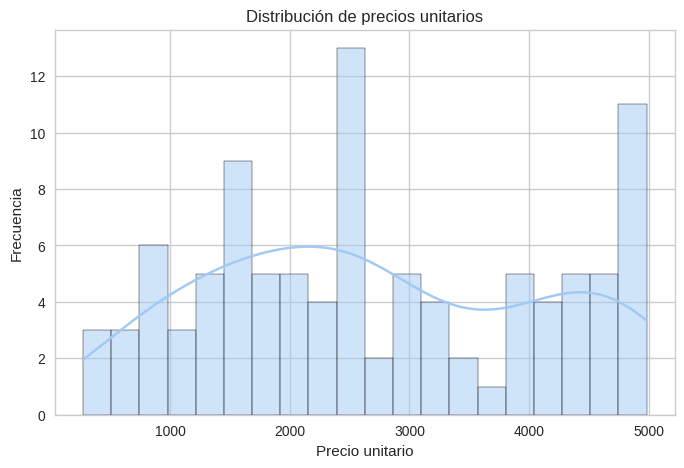

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(productos['precio_unitario'], bins=20, kde=True)
plt.title('Distribución de precios unitarios')
plt.xlabel('Precio unitario')
plt.ylabel('Frecuencia')
plt.show()

### **Análisis de categorías**


📦 Productos por categoría:
Alimentos: 50
Limpieza:  50


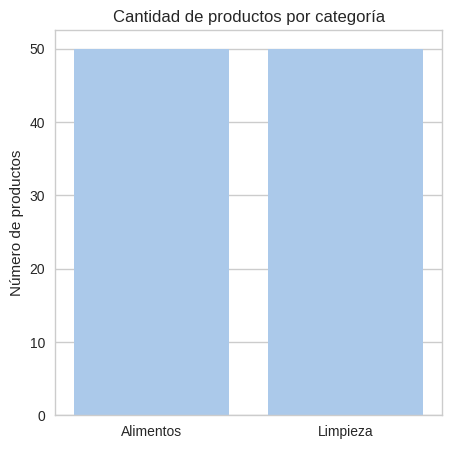

In [22]:
# Cada columna binaria indica pertenencia a esa categoría
conteo_alimentos = productos['cat_Alimentos'].sum()
conteo_limpieza = productos['cat_Limpieza'].sum()

print("\n📦 Productos por categoría:")
print(f"Alimentos: {conteo_alimentos}")
print(f"Limpieza:  {conteo_limpieza}")

# Gráfico de barras por categoría
plt.figure(figsize=(5,5))
sns.barplot(x=['Alimentos', 'Limpieza'], y=[conteo_alimentos, conteo_limpieza])
plt.title('Cantidad de productos por categoría')
plt.ylabel('Número de productos')
plt.show()

### **Comparación de precios promedio por categoría (opcional pero recomendado)**

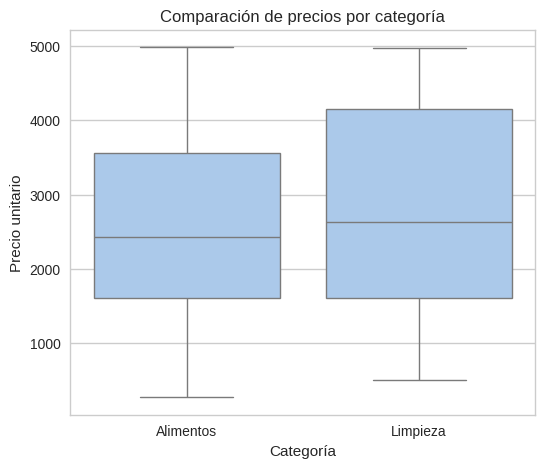

In [23]:
# Convertir las columnas binarias en un formato más fácil de graficar
categorias = {
    'Alimentos': productos.loc[productos['cat_Alimentos'] == 1, 'precio_unitario'],
    'Limpieza': productos.loc[productos['cat_Limpieza'] == 1, 'precio_unitario']
}

precios_cat = pd.DataFrame({cat: datos.values for cat, datos in categorias.items()})
precios_cat = precios_cat.melt(var_name='Categoría', value_name='Precio')

plt.figure(figsize=(6,5))
sns.boxplot(x='Categoría', y='Precio', data=precios_cat)
plt.title('Comparación de precios por categoría')
plt.ylabel('Precio unitario')
plt.show()